### Problem Statement

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

1. Demographics (city, age, gender etc.)
2. Tenure information (joining date, Last Date)
3. Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn.metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
warnings.filterwarnings('ignore')

In [369]:
pd.set_option('display.max_columns',100)

In [370]:
ola = pd.read_csv("G:/Scaler Academy/Case Studies/OLA-ENSEMBLE/ola_driver_scaler.csv")

In [371]:
ola.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [372]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


There are 19104 rows of data with 12 columns (Not considering the 1st Unnamed Column) <br>
Majority of the columns 8 out of 12 are numeric and rest 4 are object which are mostly dates and city names <br>
Lastworking date being the Target variable has only 1616 Non-Null values (the drivers who actually left) <br>

In [373]:
ola.drop('Unnamed: 0',axis=1,inplace=True)

In [443]:
ola.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Joining_Year,Joining_Month,Income_Start,Income_End,Quarterly_Rating_Beginning,Quarterly_Rating_End
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000
mean,1415.591133,34.663871,0.418970,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899,2017.776330,6.823178,65652.025126,65652.025126,2.008899,2.008899
std,810.705321,6.252745,0.493403,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832,1.920872,3.131894,30914.515344,30914.515344,1.009832,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000,2013.000000,1.000000,10747.000000,10747.000000,1.000000,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000,2016.000000,5.000000,42383.000000,42383.000000,1.000000,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000,2018.000000,7.000000,60087.000000,60087.000000,2.000000,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000,2019.000000,9.000000,83969.000000,83969.000000,3.000000,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000,2020.000000,12.000000,188418.000000,188418.000000,4.000000,4.000000


#### Converting the columns:['MMM-YY','Dateofjoining'] to datetime format

In [374]:
## Converting the columns:['MMM-YY','Dateofjoining'] to datetime format
cols=['MMM-YY','Dateofjoining']

for col in cols:
    ola[col] = pd.to_datetime(ola[col], format="%d/%m/%y")

In [375]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   object        
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

Extracting year and Month from Joining date as it would help in Predicting Age for KNN-Imputation

In [376]:
ola['Joining_Year']=ola['Dateofjoining'].dt.year
ola['Joining_Month']=ola['Dateofjoining'].dt.month
ola.drop('Dateofjoining',axis=1,inplace=True)

In [377]:
##Marking all the rows where there is no date as 0 (There is no Last working date)
## Whereever there is a date will make it one
ola['LastWorkingDate'].fillna(0,inplace=True)

In [378]:
## In the info of dataset we know that there were 1616 Non-Nul values which are no 1, and rest values are 0 
ola.loc[ola['LastWorkingDate'] != 0, 'LastWorkingDate'] = 1
ola['LastWorkingDate'].value_counts()

0    17488
1     1616
Name: LastWorkingDate, dtype: int64

In [379]:
## Let us impute Age and Gender using KNN Imputer, do not want to impute LastWorkingDate as there having Null also makes sense
ola.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'LastWorkingDate', 'Joining Designation', 'Grade',
       'Total Business Value', 'Quarterly Rating', 'Joining_Year',
       'Joining_Month'],
      dtype='object')

### Missing Value Imputation Using KNN-Imputer

In [380]:
for col in [ola.columns]:
    print(ola[col].isnull().sum()/len(ola[col])*100)

MMM-YY                  0.000000
Driver_ID               0.000000
Age                     0.319305
Gender                  0.272194
City                    0.000000
Education_Level         0.000000
Income                  0.000000
LastWorkingDate         0.000000
Joining Designation     0.000000
Grade                   0.000000
Total Business Value    0.000000
Quarterly Rating        0.000000
Joining_Year            0.000000
Joining_Month           0.000000
dtype: float64


The percentage of missing values is less than 1%, we could drop it, but i am going Ahead with KNN Imputer to fill Age and Gender

In [381]:
ola_KNN=ola[['Age', 'Gender', 'Education_Level',
       'Income', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating','Joining_Year',
       'Joining_Month']]

In [382]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
ola_KNN = imputer.fit_transform(ola_KNN)

In [383]:
## KNN Imputer outputs numpy array, converting that into Pandas DataFrame
ola_KNN=pd.DataFrame(data = ola_KNN, 
                  index = ola.index, 
                  columns = ['Age', 'Gender', 'Education_Level',
       'Income', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating','Joining_Year',
       'Joining_Month'])

In [384]:
ola_KNN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   19104 non-null  float64
 1   Gender                19104 non-null  float64
 2   Education_Level       19104 non-null  float64
 3   Income                19104 non-null  float64
 4   Joining Designation   19104 non-null  float64
 5   Grade                 19104 non-null  float64
 6   Total Business Value  19104 non-null  float64
 7   Quarterly Rating      19104 non-null  float64
 8   Joining_Year          19104 non-null  float64
 9   Joining_Month         19104 non-null  float64
dtypes: float64(10)
memory usage: 1.5 MB


In [385]:
### We see that Age and Gender are now imputed, we can copy these values to the actual dataset now

In [386]:
ola['Age']=ola_KNN['Age']
ola['Gender']=ola_KNN['Gender']

In [387]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19104 non-null  float64       
 3   Gender                19104 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   LastWorkingDate       19104 non-null  object        
 8   Joining Designation   19104 non-null  int64         
 9   Grade                 19104 non-null  int64         
 10  Total Business Value  19104 non-null  int64         
 11  Quarterly Rating      19104 non-null  int64         
 12  Joining_Year          19104 non-null  int64         
 13  Joining_Month   

In [388]:
ola['Gender'].value_counts()

0.0    11082
1.0     7984
0.6       13
0.4        9
0.2        9
0.8        7
Name: Gender, dtype: int64

In [389]:
ola['Gender'] = np.where(ola['Gender']<0.5, 0, 1)
ola['Gender'].value_counts()

0    11100
1     8004
Name: Gender, dtype: int64

### UniVariate Analysis

<AxesSubplot: ylabel='Gender'>

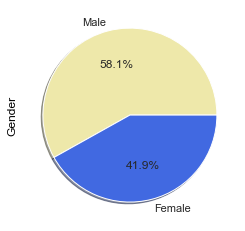

In [531]:
pie_colors=['palegoldenrod', 'royalblue']
my_labels = ["Male", "Female"]
ola['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=pie_colors, shadow =True,labels=my_labels)

Males and females are in the ratio of 6:4

[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

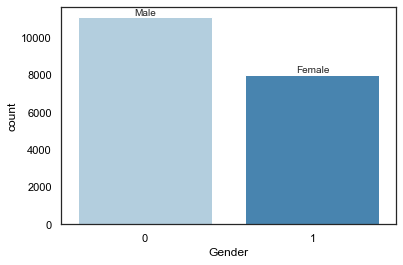

In [391]:
ax = sns.countplot(x=ola['Gender'],palette="Blues")
ax.bar_label(container=ax.containers[0], labels=["Male", "Female"])

In [392]:
## There are close to 20% more males than females

Text(0.5, 1.0, 'Joining Year')

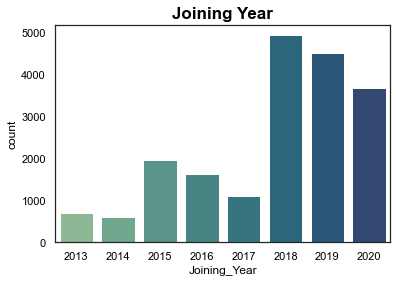

In [532]:
ax = sns.countplot(x=ola['Joining_Year'],palette="crest")
plt.title('Joining Year',fontsize=17, fontweight='bold',color='Black')

Majority of the drivers and trips appear to have happened between 2018-2020

Text(0.5, 1.0, 'Joining Month')

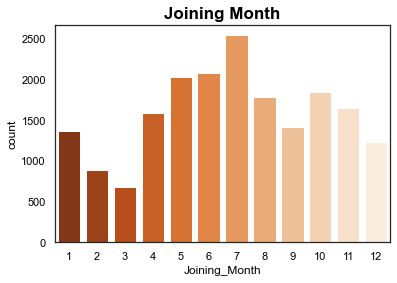

In [533]:
## Months January to February are from 1-12
ax = sns.countplot(x=ola['Joining_Month'],palette="Oranges_r")
plt.title('Joining Month',fontsize=17, fontweight='bold',color='Black')

Text(0.5, 1.0, 'Education_Level')

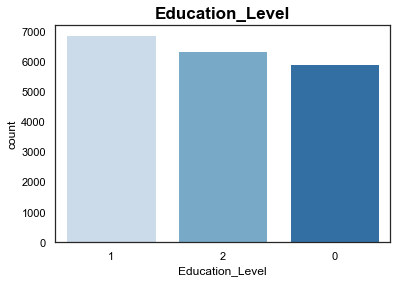

In [395]:
ax = sns.countplot(x=ola['Education_Level'],order=ola['Education_Level'].value_counts(ascending=False).index,palette="Blues")
plt.title('Education_Level',fontsize=17, fontweight='bold',color='Black')

In [396]:
##There seems to be data related to 2381 Drivers
ola['Driver_ID'].nunique()

2381

In [397]:
ola['Income'].describe()

count     19104.000000
mean      65652.025126
std       30914.515344
min       10747.000000
25%       42383.000000
50%       60087.000000
75%       83969.000000
max      188418.000000
Name: Income, dtype: float64

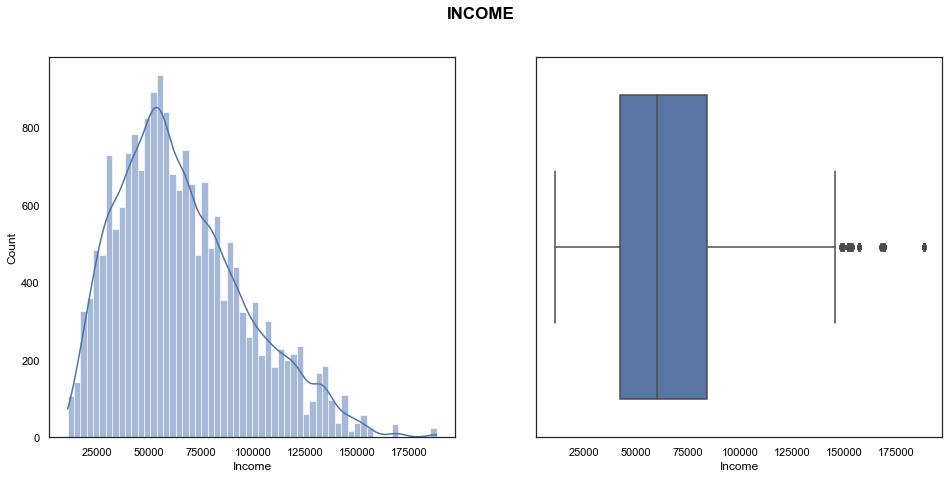

In [398]:
fig, axes = plt.subplots(1,2, figsize =(16,7))
fig.suptitle("INCOME", fontsize=17, fontweight='bold',color='Black')
sns.set(style="white",rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'white','axes.labelcolor':'Black','xtick.color': 'Black','ytick.color': 'Black'})
sns.histplot(x="Income", data = ola,kde=True, ax=axes[0])
sns.boxplot(x="Income", data = ola, ax=axes[1])
plt.show()

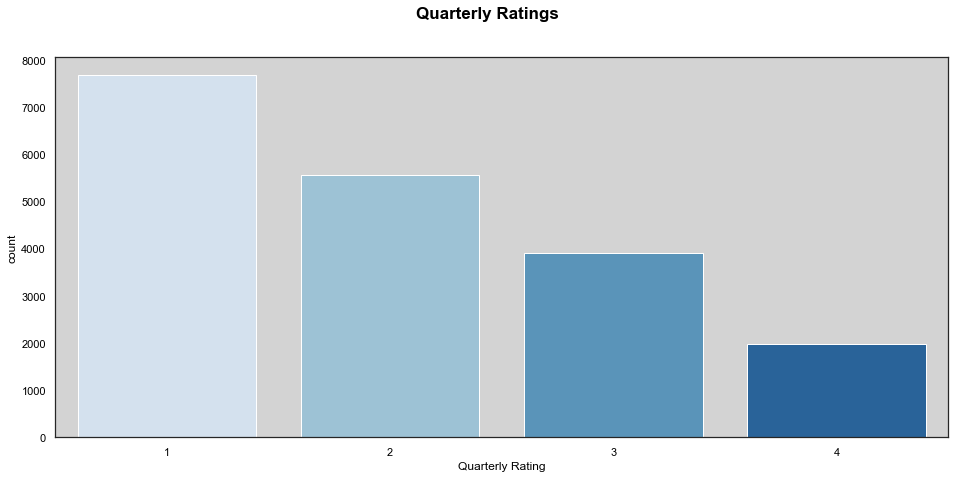

In [406]:
fig, axes = plt.subplots(1,1, figsize =(16,7))
fig.suptitle("Quarterly Ratings", fontsize=17, fontweight='bold',color='Black')
sns.set(style="white",rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'white','axes.labelcolor':'Black','xtick.color': 'Black','ytick.color': 'Black'})
sns.countplot(x="Quarterly Rating", data = ola,palette="Blues")
plt.show()

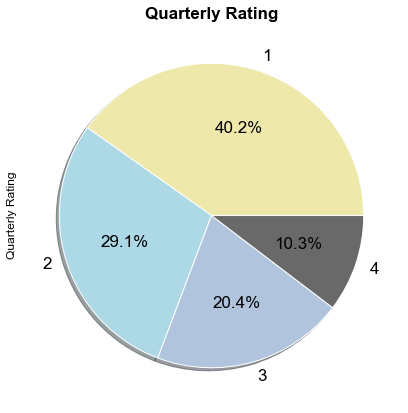

In [442]:
plt.figure(figsize=(17,7))
pie_colors=['palegoldenrod','lightblue','lightsteelblue','dimgrey']
ola['Quarterly Rating'].value_counts().plot.pie(autopct='%1.1f%%',textprops={'color':"black",'fontsize':17},shadow=True,colors=pie_colors)
plt.title('Quarterly Rating',fontsize=17, fontweight='bold',color='Black')
plt.show()

<AxesSubplot: xlabel='Quarterly Rating', ylabel='count'>

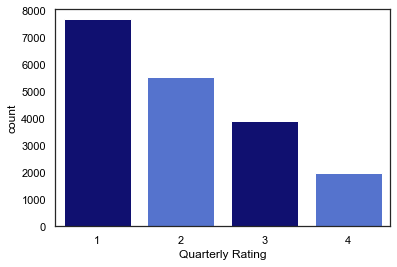

In [433]:
sns.countplot(x="Quarterly Rating", data = ola, palette=pie_colors)

In [ ]:
ola['Quarterly Rating'].value_counts().plot.pie(autopct='%1.1f%%',textprops={'color':"w",'fontsize':17},shadow=True, ax=axes[1])
plt.show()

In [402]:
ola['Joining Designation'].value_counts()

1    9831
2    5955
3    2847
4     341
5     130
Name: Joining Designation, dtype: int64

Text(0.5, 1.0, 'Joining Designation')

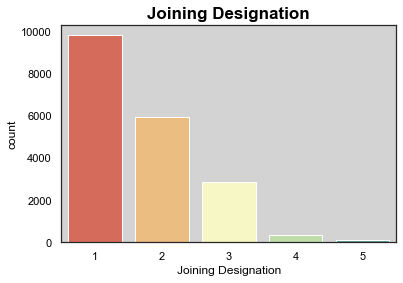

In [407]:
sns.countplot(x=ola['Joining Designation'],order=ola['Joining Designation'].value_counts(ascending=False).index,palette="Spectral")
plt.title('Joining Designation',fontsize=17, fontweight='bold',color='Black')

Text(0.5, 1.0, 'Grade')

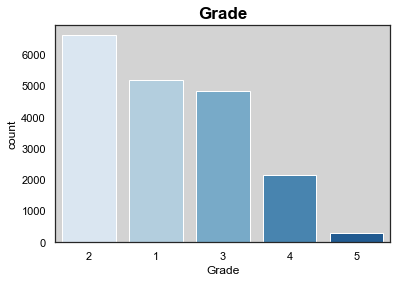

In [408]:
sns.countplot(x=ola['Grade'],order=ola['Grade'].value_counts(ascending=False).index,palette="Blues")
plt.title('Grade',fontsize=17, fontweight='bold',color='Black')

### Bi-Variate Analysis

In [409]:
ola.groupby(by='Gender')['Age','Education_Level','Income','Grade', 'Total Business Value', 'Quarterly Rating'].mean()

,Age,Education_Level,Income,Grade,Total Business Value,Quarterly Rating
Gender,,,,,,
0,34.455405,1.028649,65313.072973,2.250901,563259.727928,2.001892
1,34.952974,1.011994,66122.086207,2.255122,583314.505247,2.018616


Text(0.5, 1.0, 'Age vs Income')

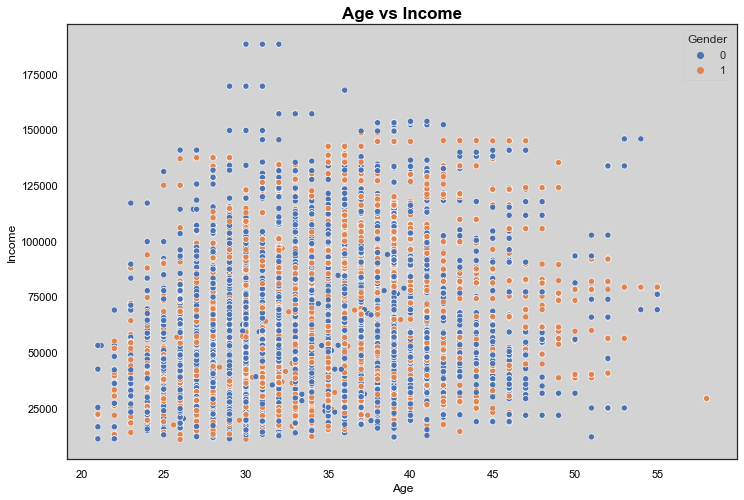

In [410]:
## There seems to no big relation or trend between Income and Age
plt.figure(figsize=(12,8))
sns.scatterplot(data=ola,x='Age',y='Income',hue='Gender')
plt.title('Age vs Income',fontsize=17, fontweight='bold',color='Black')

Text(0.5, 1.0, 'Grade vs Income')

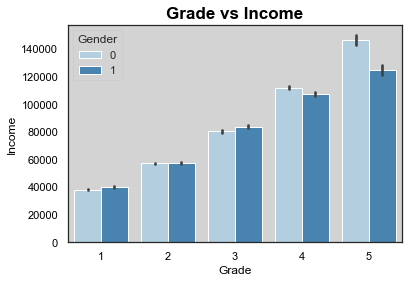

In [411]:
sns.barplot(x=ola['Grade'],y=ola['Income'],hue=ola['Gender'],palette="Blues")
plt.title('Grade vs Income',fontsize=17, fontweight='bold',color='Black')

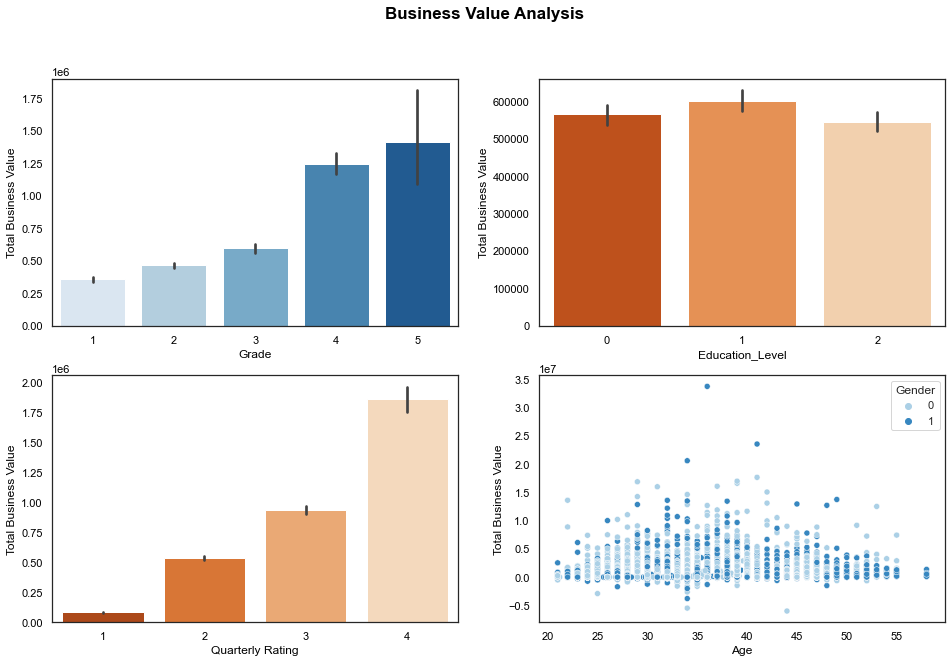

In [413]:
fig, axes = plt.subplots(2,2, figsize =(16,10))
fig.suptitle("Business Value Analysis", fontsize=17, fontweight='bold',color='Black')
sns.set(style="white",rc={'axes.facecolor':'white', 'figure.facecolor':'white','axes.labelcolor':'Black','xtick.color': 'Black','ytick.color': 'Black'})
sns.barplot(x=ola['Grade'],y=ola['Total Business Value'], palette='Blues', ax=axes[0,0])
sns.barplot(x=ola['Education_Level'],y=ola['Total Business Value'], palette='Oranges_r', ax=axes[0,1])
sns.barplot(x=ola['Quarterly Rating'],y=ola['Total Business Value'], palette='Oranges_r', ax=axes[1,0])
sns.scatterplot(data=ola,x='Age',y='Total Business Value',hue='Gender', palette='Blues', ax=axes[1,1])
plt.show()

In [ ]:
ola.info()

In [ ]:
##To get above columns for rating or salary - I will create first 2 seperate columns with first value and last value, if diff > 0 then 1 
##similarly for other one too 

In [414]:
ola['Income_Start']=ola['Income']
ola['Income_End']=ola['Income']
ola['Quarterly_Rating_Beginning']=ola['Quarterly Rating']
ola['Quarterly_Rating_End']=ola['Quarterly Rating']

ola_grouped = ola.groupby(by=['Driver_ID'],as_index=False)
ola_grouped =ola_grouped.agg({
                        'MMM-YY':'last', 
                        'Age':'last',
                        'Gender':'last',
                        'City': 'last',
                        'Education_Level': 'last',
                        'Income_Start':'first',
                        'Income_End':'last',
                        'Income':np.mean,
                        'Quarterly_Rating_Beginning':'first',
                        'Quarterly_Rating_End':'last',
'LastWorkingDate':'last','Joining Designation':'last','Grade':'last',
       'Total Business Value':np.mean, 'Joining_Year':'last',
       'Joining_Month':'last'
})

In [415]:
ola_grouped.head(5)

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income_Start,Income_End,Income,Quarterly_Rating_Beginning,Quarterly_Rating_End,LastWorkingDate,Joining Designation,Grade,Total Business Value,Joining_Year,Joining_Month
0,1,2019-01-03,28.0,0,C23,2,57387,57387,57387.0,2,2,1,1,1,571860.0,2018,12
1,2,2020-01-12,31.0,0,C7,2,67016,67016,67016.0,1,1,0,2,2,0.0,2020,6
2,4,2020-01-04,43.0,0,C13,2,65603,65603,65603.0,1,1,1,2,2,70000.0,2019,7
3,5,2019-01-03,29.0,0,C9,0,46368,46368,46368.0,1,1,1,1,1,40120.0,2019,9
4,6,2020-01-12,31.0,1,C11,1,78728,78728,78728.0,1,2,0,3,3,253000.0,2020,7


In [416]:
ola_grouped.columns

Index(['Driver_ID', 'MMM-YY', 'Age', 'Gender', 'City', 'Education_Level',
       'Income_Start', 'Income_End', 'Income', 'Quarterly_Rating_Beginning',
       'Quarterly_Rating_End', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Joining_Year', 'Joining_Month'],
      dtype='object')

<AxesSubplot: >

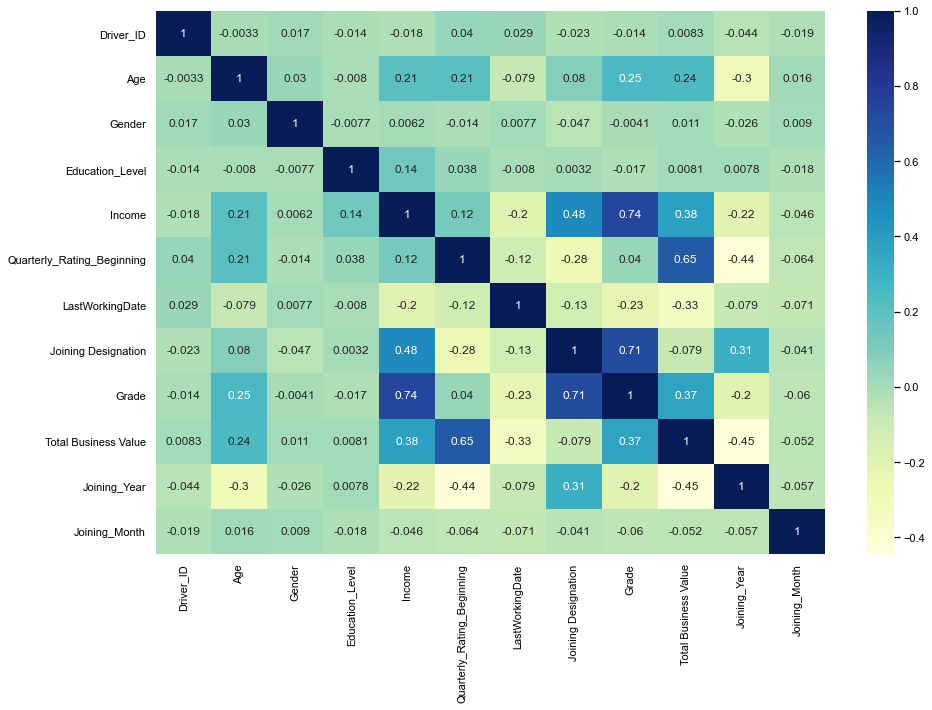

In [417]:
corr = ola_grouped[['Driver_ID', 'MMM-YY', 'Age', 'Gender', 'City', 'Education_Level',
       'Income','Quarterly_Rating_Beginning', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Joining_Year', 'Joining_Month']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<Figure size 7200x5040 with 0 Axes>

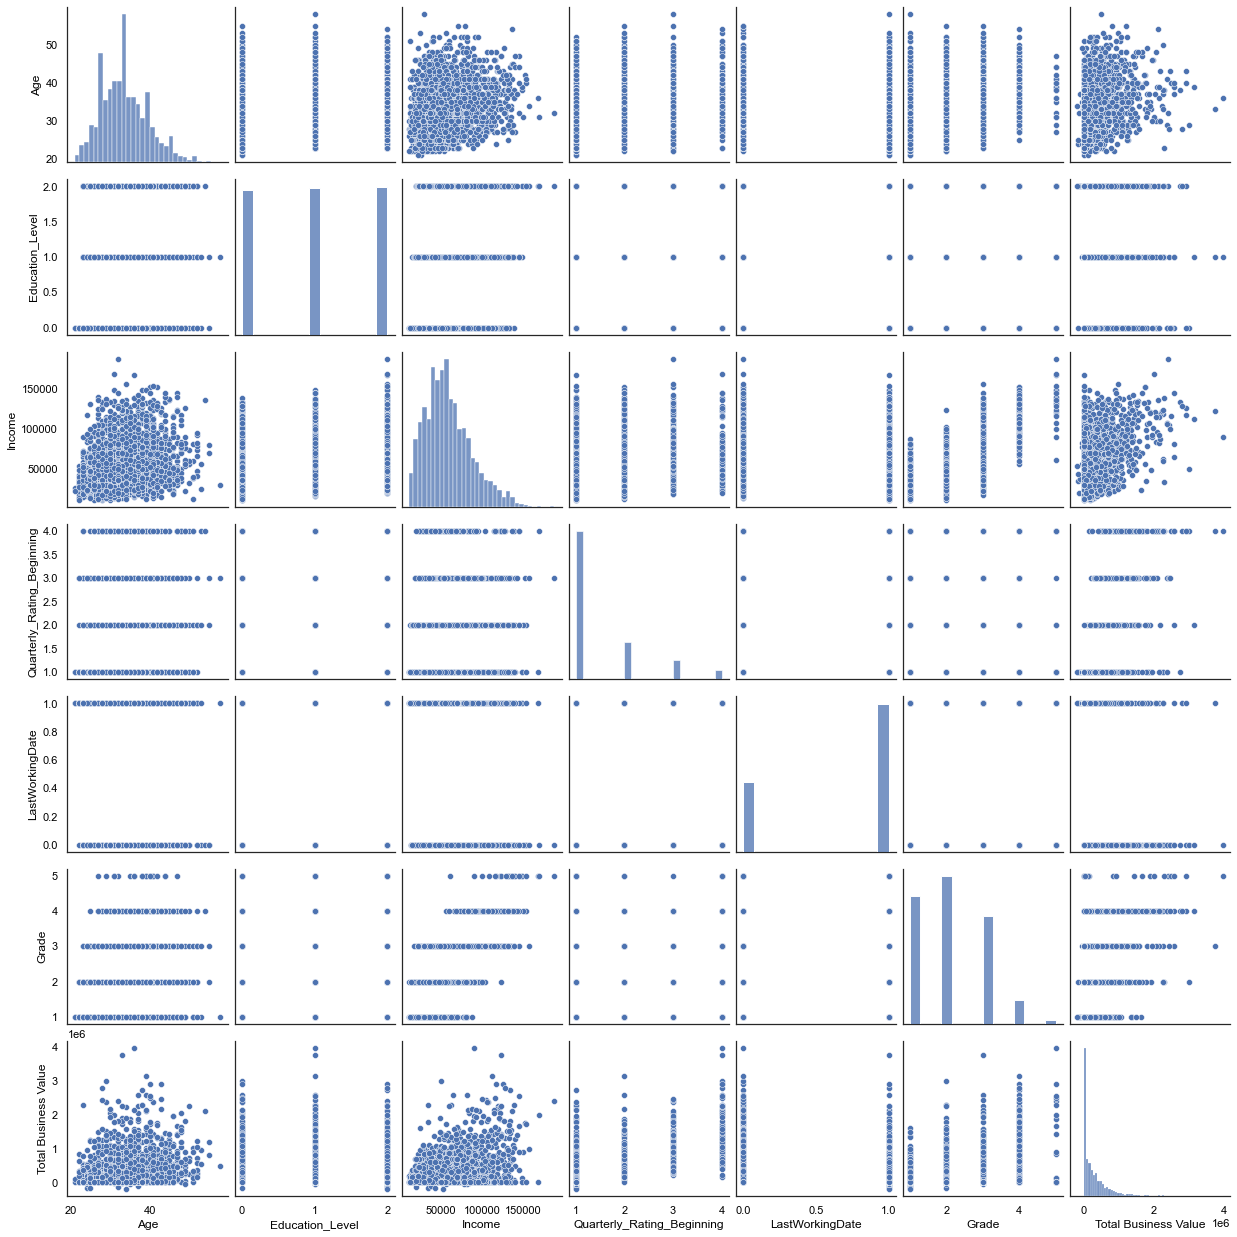

In [418]:
plt.figure(figsize=(100,70))
sns.pairplot(ola_grouped[[ 'Age', 'Education_Level',
       'Income','Quarterly_Rating_Beginning', 'LastWorkingDate',
       'Grade', 'Total Business Value']])

In [ ]:
### Bi-Variate and Multi-variate based on Target Variable

Text(0.5, 1.0, 'Age vs Income')

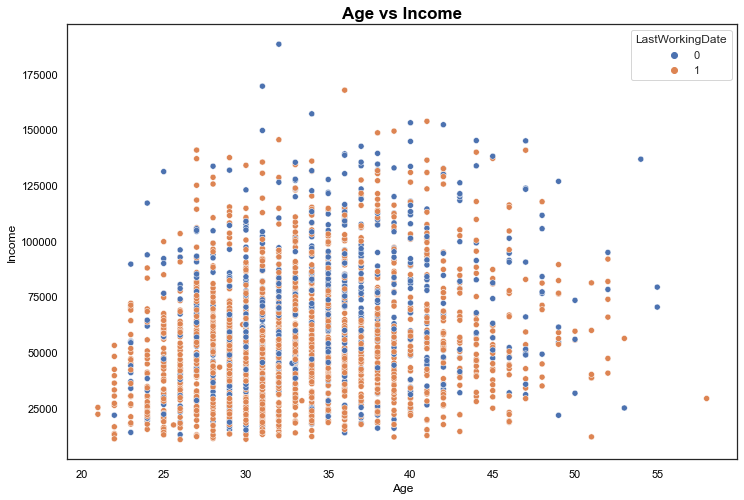

In [419]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=ola_grouped,x='Age',y='Income',hue='LastWorkingDate')
plt.title('Age vs Income',fontsize=17, fontweight='bold',color='Black')

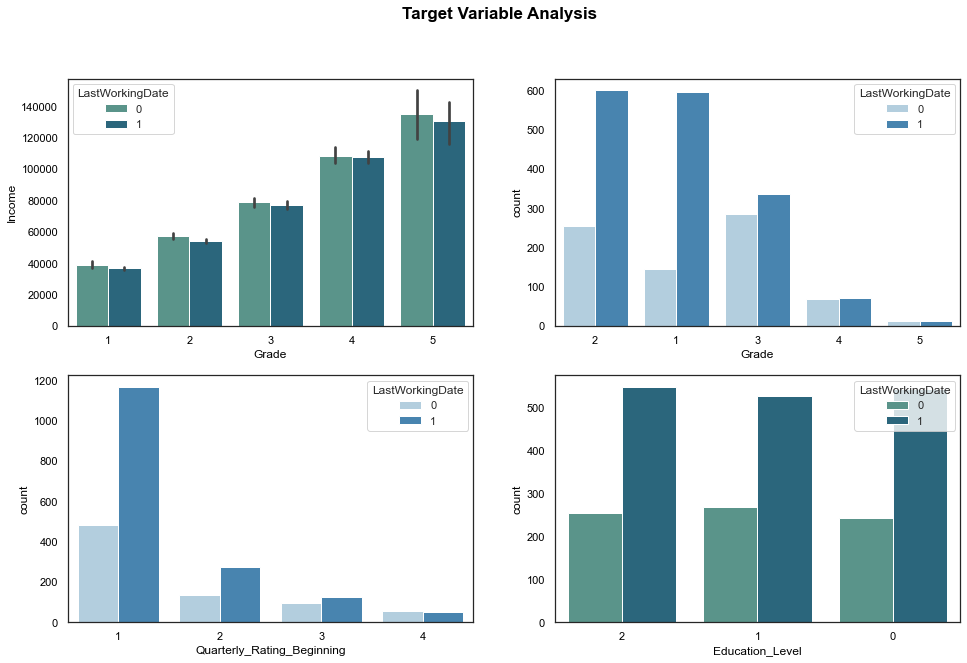

In [420]:
fig, axes = plt.subplots(2,2, figsize =(16,10))
fig.suptitle("Target Variable Analysis", fontsize=17, fontweight='bold',color='Black')
sns.set(style="white",rc={'axes.facecolor':'white', 'figure.facecolor':'white','axes.labelcolor':'Black','xtick.color': 'Black','ytick.color': 'Black'})
sns.barplot(x=ola_grouped['Grade'],y=ola_grouped['Income'],hue=ola_grouped['LastWorkingDate'],palette="crest",ax=axes[0,0])
sns.countplot(x=ola_grouped['Grade'],hue=ola_grouped['LastWorkingDate'],order=ola_grouped['Grade'].value_counts(ascending=False).index,palette="Blues",ax=axes[0,1])
sns.countplot(x=ola_grouped['Quarterly_Rating_Beginning'],hue=ola_grouped['LastWorkingDate'],order=ola_grouped['Quarterly_Rating_Beginning'].value_counts(ascending=False).index,palette="Blues",ax=axes[1,0])
sns.countplot(x=ola_grouped['Education_Level'],hue=ola_grouped['LastWorkingDate'],order=ola_grouped['Education_Level'].value_counts(ascending=False).index,palette="crest",ax=axes[1,1])
plt.show()

### Outlier Detection

In [421]:
##Outlier Detection on the only 2 Numeric Columns
Q1 = ola_grouped[['Income','Total Business Value']].quantile(0.25)
Q3 = ola_grouped[['Income','Total Business Value']].quantile(0.75)
IQR = Q3 - Q1
((ola_grouped[['Income','Total Business Value']] < (Q1 - 1.5 * IQR)) | (ola_grouped[['Income','Total Business Value']] > (Q3 + 1.5 * IQR))).sum()

Income                   47
Total Business Value    148
dtype: int64

In [422]:
## As we have very less outliers, i am dropping those values
ola_grouped= ola_grouped[(ola_grouped['Total Business Value']>(Q1['Total Business Value']-(1.5*IQR['Total Business Value']))) & (ola_grouped['Total Business Value']<(Q3['Total Business Value']+(1.5*IQR['Total Business Value'])))]
ola_grouped

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income_Start,Income_End,Income,Quarterly_Rating_Beginning,Quarterly_Rating_End,LastWorkingDate,Joining Designation,Grade,Total Business Value,Joining_Year,Joining_Month
0,1,2019-01-03,28.0,0,C23,2,57387,57387,57387.0,2,2,1,1,1,571860.000000,2018,12
1,2,2020-01-12,31.0,0,C7,2,67016,67016,67016.0,1,1,0,2,2,0.000000,2020,6
2,4,2020-01-04,43.0,0,C13,2,65603,65603,65603.0,1,1,1,2,2,70000.000000,2019,7
3,5,2019-01-03,29.0,0,C9,0,46368,46368,46368.0,1,1,1,1,1,40120.000000,2019,9
4,6,2020-01-12,31.0,1,C11,1,78728,78728,78728.0,1,2,0,3,3,253000.000000,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,2020-01-12,34.0,0,C24,0,82815,82815,82815.0,3,4,0,2,3,906200.833333,2015,10
2377,2785,2020-01-10,34.0,1,C9,0,12105,12105,12105.0,1,1,1,1,1,0.000000,2020,8
2378,2786,2019-01-09,45.0,0,C19,0,35370,35370,35370.0,2,1,1,2,2,312787.777778,2018,7
2379,2787,2019-01-06,28.0,1,C20,2,69498,69498,69498.0,2,1,1,1,1,162971.666667,2018,7


In [423]:
### MMMM-YY will not be of a great siginificance hence dropping the column
ola_grouped.drop('MMM-YY',axis=1,inplace=True)

#### Adding the 2 new features for Income and Rating increase

In [424]:
ola_grouped['Income_Increase']=np.where(ola_grouped['Income_End']>ola_grouped['Income_Start'],1,0)

In [425]:
ola_grouped['Income_Increase'].value_counts()

0    2221
1      12
Name: Income_Increase, dtype: int64

In [426]:
ola_grouped['Rating_Increase']=np.where(ola_grouped['Quarterly_Rating_End']>ola_grouped['Quarterly_Rating_Beginning'],1,0)

In [427]:
ola_grouped['Rating_Increase'].value_counts()

0    1923
1     310
Name: Rating_Increase, dtype: int64

In [428]:
ola_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 0 to 2380
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Driver_ID                   2233 non-null   int64  
 1   Age                         2233 non-null   float64
 2   Gender                      2233 non-null   int32  
 3   City                        2233 non-null   object 
 4   Education_Level             2233 non-null   int64  
 5   Income_Start                2233 non-null   int64  
 6   Income_End                  2233 non-null   int64  
 7   Income                      2233 non-null   float64
 8   Quarterly_Rating_Beginning  2233 non-null   int64  
 9   Quarterly_Rating_End        2233 non-null   int64  
 10  LastWorkingDate             2233 non-null   int64  
 11  Joining Designation         2233 non-null   int64  
 12  Grade                       2233 non-null   int64  
 13  Total Business Value        2233 

In [429]:
ola_grouped.drop(['Income_Start','Income_End'],axis=1,inplace=True)

### Encoding

In [430]:
## Apart from City all the other variables are numerical and i do not think any further encoding he needed for these Columns.
ola_grouped= pd.get_dummies(ola_grouped, columns=['City'], drop_first=True)

In [431]:
ola_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 0 to 2380
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Driver_ID                   2233 non-null   int64  
 1   Age                         2233 non-null   float64
 2   Gender                      2233 non-null   int32  
 3   Education_Level             2233 non-null   int64  
 4   Income                      2233 non-null   float64
 5   Quarterly_Rating_Beginning  2233 non-null   int64  
 6   Quarterly_Rating_End        2233 non-null   int64  
 7   LastWorkingDate             2233 non-null   int64  
 8   Joining Designation         2233 non-null   int64  
 9   Grade                       2233 non-null   int64  
 10  Total Business Value        2233 non-null   float64
 11  Joining_Year                2233 non-null   int64  
 12  Joining_Month               2233 non-null   int64  
 13  Income_Increase             2233 

### Additional EDA Post aggregating the data and data Pre-processing

In [434]:
ola_grouped.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Quarterly_Rating_Beginning,Quarterly_Rating_End,LastWorkingDate,Joining Designation,Grade,Total Business Value,Joining_Year,Joining_Month,Income_Increase,Rating_Increase,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,City_C19,City_C2,City_C20,City_C21,City_C22,City_C23,City_C24,City_C25,City_C26,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
count,2233.000000,2233.00000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.00000,2233.000000,2233.000000,2.233000e+03,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.00000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,1401.653381,33.45768,0.408419,1.009852,56816.452742,1.400806,1.351097,0.70936,1.824451,2.012091,2.232498e+05,2018.648007,6.973578,0.005374,0.138827,0.035826,0.026870,0.033139,0.028661,0.031796,0.042991,0.034035,0.030900,0.030004,0.030452,0.030452,0.064487,0.034035,0.035826,0.032244,0.029109,0.031348,0.038961,0.037618,0.034035,0.03717,0.035378,0.031796,0.033139,0.033587,0.032244,0.037618,0.032691
std,805.514187,5.86900,0.491652,0.816986,26443.300262,0.735760,0.718652,0.45416,0.834189,0.879545,2.619157e+05,1.500498,3.222168,0.073126,0.345843,0.185898,0.161739,0.179040,0.166889,0.175495,0.202883,0.181360,0.173086,0.170638,0.171867,0.171867,0.245674,0.181360,0.185898,0.176686,0.168149,0.174295,0.193545,0.190312,0.181360,0.18922,0.184776,0.175495,0.179040,0.180204,0.176686,0.190312,0.177868
min,1.000000,21.00000,0.000000,0.000000,10747.000000,1.000000,1.000000,0.00000,1.000000,1.000000,-1.979329e+05,2013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,700.000000,29.00000,0.000000,0.000000,38059.000000,1.000000,1.000000,0.00000,1.000000,1.000000,0.000000e+00,2018.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1410.000000,33.00000,0.000000,1.000000,53480.000000,1.000000,1.000000,1.00000,2.000000,2.000000,1.269500e+05,2019.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2102.000000,37.00000,1.000000,2.000000,71740.000000,2.000000,1.000000,1.00000,2.000000,3.000000,3.662150e+05,2020.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2788.000000,58.00000,1.000000,2.000000,167758.000000,4.000000,4.000000,1.00000,5.000000,5.000000,1.073209e+06,2020.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Joining Designation')

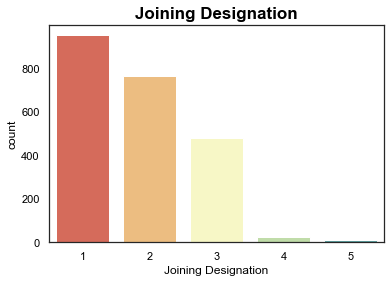

In [534]:
sns.countplot(x=ola_grouped['Joining Designation'],order=ola_grouped['Joining Designation'].value_counts(ascending=False).index,palette="Spectral")
plt.title('Joining Designation',fontsize=17, fontweight='bold',color='Black')

Text(0.5, 1.0, 'Grade')

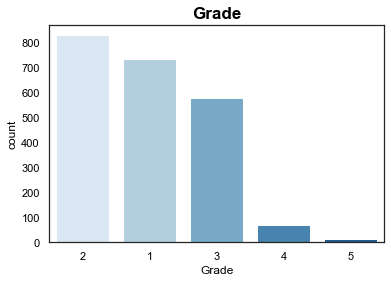

In [535]:
sns.countplot(x=ola_grouped['Grade'],order=ola_grouped['Grade'].value_counts(ascending=False).index,palette="Blues")
plt.title('Grade',fontsize=17, fontweight='bold',color='Black')

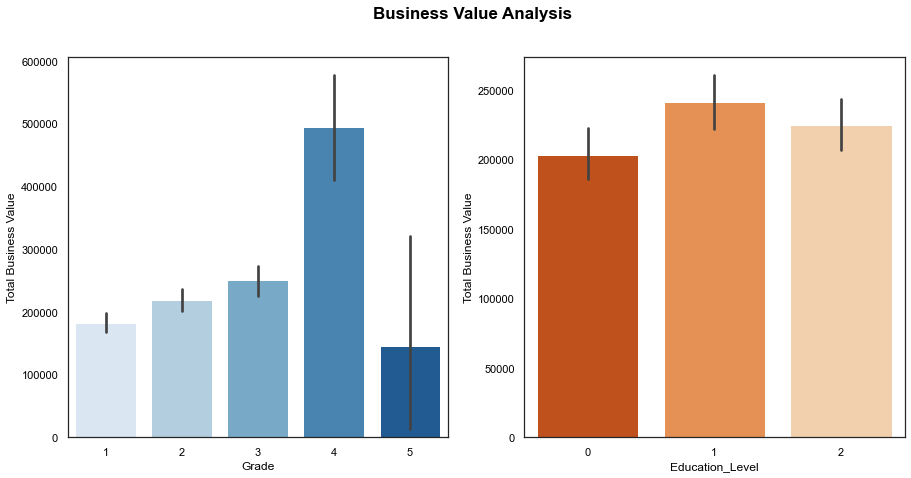

In [542]:
fig, axes = plt.subplots(1,2, figsize =(15,7))
fig.suptitle("Business Value Analysis", fontsize=17, fontweight='bold',color='Black')
sns.set(style="white",rc={'axes.facecolor':'white', 'figure.facecolor':'white','axes.labelcolor':'Black','xtick.color': 'Black','ytick.color': 'Black'})
sns.barplot(x=ola_grouped['Grade'],y=ola_grouped['Total Business Value'], palette='Blues', ax=axes[0])
sns.barplot(x=ola_grouped['Education_Level'],y=ola_grouped['Total Business Value'], palette='Oranges_r', ax=axes[1])
plt.show()

<AxesSubplot: xlabel='Income_Increase', ylabel='count'>

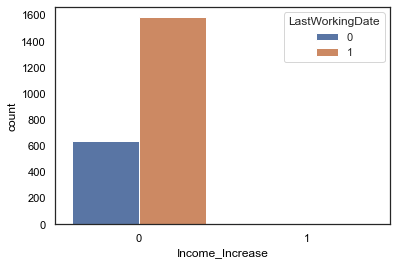

In [544]:
sns.countplot(x=ola_grouped['Income_Increase'],hue=ola_grouped['LastWorkingDate'])

As there are only 12 drivers whose income increased, close 60% of the people who got no income increase left and None from those whose income increased have left

In [546]:
ola_grouped.groupby('Income_Increase')['LastWorkingDate'].value_counts()

Income_Increase  LastWorkingDate
0                1                  1584
                 0                   637
1                0                    12
Name: LastWorkingDate, dtype: int64

<AxesSubplot: xlabel='Rating_Increase', ylabel='count'>

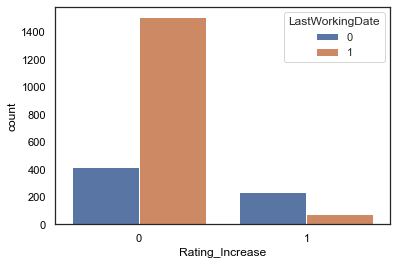

In [545]:
sns.countplot(x=ola_grouped['Rating_Increase'],hue=ola_grouped['LastWorkingDate'])

Among 1800 people who did not get a rating increase, 1400 have left

### Scaling the Needed Numerical Columns

In [338]:
## But it does not make to scale columns which have ratings, (0,1) columns etc
Numerical_cols=['Income',
 'Total Business Value','Age']

In [339]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ola_grouped[Numerical_cols]=scaler.fit_transform(ola_grouped[Numerical_cols])

In [340]:
ola_grouped.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Quarterly_Rating_Beginning,Quarterly_Rating_End,LastWorkingDate,Joining Designation,Grade,Total Business Value,Joining_Year,Joining_Month,Income_Increase,Rating_Increase,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,City_C19,City_C2,City_C20,City_C21,City_C22,City_C23,City_C24,City_C25,City_C26,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.00000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.00000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,1401.653381,0.336694,0.408419,1.009852,0.293415,1.400806,1.351097,0.70936,1.824451,2.012091,0.331342,2018.648007,6.973578,0.005374,0.138827,0.035826,0.026870,0.033139,0.028661,0.031796,0.042991,0.034035,0.030900,0.030004,0.030452,0.030452,0.064487,0.034035,0.035826,0.032244,0.029109,0.031348,0.038961,0.037618,0.034035,0.03717,0.035378,0.031796,0.033139,0.033587,0.032244,0.037618,0.032691
std,805.514187,0.158622,0.491652,0.816986,0.168417,0.735760,0.718652,0.45416,0.834189,0.879545,0.206048,1.500498,3.222168,0.073126,0.345843,0.185898,0.161739,0.179040,0.166889,0.175495,0.202883,0.181360,0.173086,0.170638,0.171867,0.171867,0.245674,0.181360,0.185898,0.176686,0.168149,0.174295,0.193545,0.190312,0.181360,0.18922,0.184776,0.175495,0.179040,0.180204,0.176686,0.190312,0.177868
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,1.000000,1.000000,0.000000,2013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,700.000000,0.216216,0.000000,0.000000,0.173950,1.000000,1.000000,0.00000,1.000000,1.000000,0.155713,2018.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1410.000000,0.324324,0.000000,1.000000,0.272166,1.000000,1.000000,1.00000,2.000000,2.000000,0.255584,2019.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2102.000000,0.432432,1.000000,2.000000,0.388463,2.000000,1.000000,1.00000,2.000000,3.000000,0.443812,2020.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2788.000000,1.000000,1.000000,2.000000,1.000000,4.000000,4.000000,1.00000,5.000000,5.000000,1.000000,2020.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [341]:
ola_grouped.shape[0]

2233

### Test Train Split

In [342]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [343]:
# Putting feature variable to X
X = ola_grouped.drop(['LastWorkingDate','Driver_ID'],axis=1)

# Putting response variable to y
y = ola_grouped['LastWorkingDate']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Random Forest

#### Random Forest Model-1 Default Hyperparameters

In [344]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [345]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [346]:
predictions = rfc.predict(X_test)
probs = rfc.predict_proba(X_test)
probs=probs[:,[1]]

In [347]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn import metrics

In [348]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       201
           1       0.90      0.91      0.90       469

    accuracy                           0.87       670
   macro avg       0.84      0.83      0.84       670
weighted avg       0.86      0.87      0.86       670



In [349]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[152  49]
 [ 41 428]]


<AxesSubplot: >

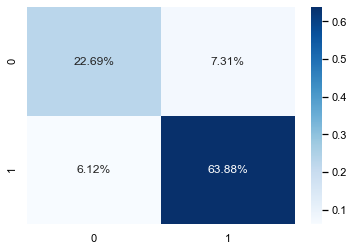

In [350]:
cf_matrix_rfc = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix_rfc/np.sum(cf_matrix_rfc), annot=True, 
            fmt='.2%', cmap='Blues')

In [351]:
print(accuracy_score(y_test,predictions))

0.8656716417910447


In [352]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds


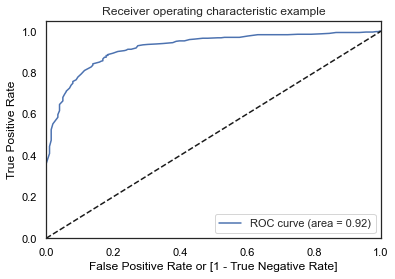

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00995025, 0.00995025, 0.01492537,
        0.01492537, 0.0199005 , 0.03482587, 0.03482587, 0.039801  ,
        0.039801  , 0.039801  , 0.04975124, 0.04975124, 0.04975124,
        0.05472637, 0.05970149, 0.05970149, 0.06965174, 0.07462687,
        0.07960199, 0.07960199, 0.08955224, 0.09452736, 0.10447761,
        0.10945274, 0.11442786, 0.12935323, 0.13432836, 0.13930348,
        0.13930348, 0.15920398, 0.1641791 , 0.16915423, 0.16915423,
        0.17412935, 0.17910448, 0.17910448, 0.1840796 , 0.1840796 ,
        0.19900498, 0.21393035, 0.2238806 , 0.23383085, 0.23880597,
        0.24378109, 0.25373134, 0.26865672, 0.27363184, 0.28855721,
        0.30348259, 0.32835821, 0.34825871, 0.37810945, 0.3880597 ,
        0.39800995, 0.41293532, 0.4278607 , 0.44278607, 0.46766169,
        0.48258706, 0.51243781, 0.52238806, 0.53233831, 0.56218905,
        0.57711443, 0.60199005, 0.62189055, 0.63

In [353]:
draw_roc( y_test, probs )

### Re-do the same Random forest after applying SMOTE.

In [354]:
print(y_train.value_counts())

1    1115
0     448
Name: LastWorkingDate, dtype: int64


In [355]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

#### Random Forest Model 2 - After Smote

In [356]:
print(y_train.value_counts())

1    1115
0    1115
Name: LastWorkingDate, dtype: int64


In [357]:
rfc2 = RandomForestClassifier()

In [358]:
rfc2.fit(X_train,y_train)

RandomForestClassifier()

In [359]:
predictions2 = rfc2.predict(X_test)
probs2 = rfc2.predict_proba(X_test)
probs2=probs2[:,[1]]

In [360]:
# Let's check the report of our default model
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76       201
           1       0.93      0.83      0.88       469

    accuracy                           0.84       670
   macro avg       0.81      0.84      0.82       670
weighted avg       0.86      0.84      0.84       670



In [361]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions2))

[[171  30]
 [ 78 391]]


<AxesSubplot: >

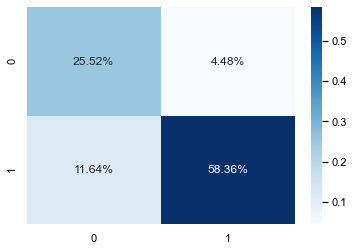

In [362]:
cf_matrix_rfc2 = confusion_matrix(y_test, predictions2)
sns.heatmap(cf_matrix_rfc2/np.sum(cf_matrix_rfc2), annot=True, 
            fmt='.2%', cmap='Blues')

In [363]:
print(accuracy_score(y_test,predictions2))

0.8388059701492537


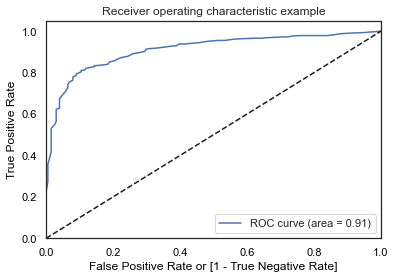

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00497512, 0.00497512,
        0.00497512, 0.00995025, 0.01492537, 0.01492537, 0.01492537,
        0.01492537, 0.01492537, 0.01492537, 0.01492537, 0.01492537,
        0.02487562, 0.02985075, 0.02985075, 0.02985075, 0.02985075,
        0.02985075, 0.02985075, 0.039801  , 0.039801  , 0.039801  ,
        0.039801  , 0.04477612, 0.05472637, 0.05970149, 0.05970149,
        0.06467662, 0.06467662, 0.06965174, 0.07960199, 0.07960199,
        0.07960199, 0.08955224, 0.08955224, 0.10447761, 0.10447761,
        0.11442786, 0.11940299, 0.13930348, 0.14427861, 0.14427861,
        0.14925373, 0.1641791 , 0.1840796 , 0.18905473, 0.2039801 ,
        0.20895522, 0.21393035, 0.2238806 , 0.24378109, 0.25870647,
        0.26865672, 0.29353234, 0.29850746, 0.30348259, 0.33333333,
        0.35323383, 0.36318408, 0.37313433, 0.3880597 , 0.39800995,
        0.41293532, 0.45771144, 0.47263682, 0.48

In [364]:
draw_roc(y_test, probs2)

### Hyper parameter tuning for Random forest

In [445]:
### Came to these parameters by individualy performance hyperparam tuning, did not add all those as it would make the notebook lengthy

In [446]:
param_grid = {
    'max_depth': [10,15,20],
    'min_samples_leaf': [4,5,6],
    'min_samples_split': [4,5,6],
    'n_estimators': [50,100,150], 
    'max_features': [15,20,25]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3,verbose = 1)

In [447]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': [15, 20, 25],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [50, 100, 150]},
             verbose=1)

In [448]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8470889593192377 using {'max_depth': 15, 'max_features': 20, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 150}


#### Random Forest Model 3 

In [485]:
rfc3 = RandomForestClassifier(bootstrap=True,
                             max_depth=15,
                             min_samples_leaf=4, 
                             min_samples_split=4,
                             max_features=20,
                             n_estimators=150)

In [486]:
rfc3.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, max_features=20, min_samples_leaf=4,
                       min_samples_split=4, n_estimators=150)

In [487]:
predictions3 = rfc3.predict(X_test)
probs3 = rfc3.predict_proba(X_test)
probs3=probs3[:,[1]]

In [488]:
# Let's check the report of our tuned model
print(classification_report(y_test,predictions3))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78       201
           1       0.93      0.86      0.89       469

    accuracy                           0.86       670
   macro avg       0.83      0.86      0.84       670
weighted avg       0.87      0.86      0.86       670



In [489]:
print(accuracy_score(y_test,predictions3))

0.8567164179104477


In [490]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions3))

[[172  29]
 [ 67 402]]


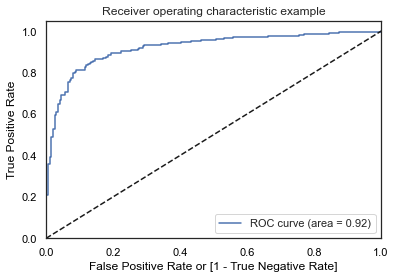

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [491]:
draw_roc(y_test, probs3)

In [456]:
### In this problem Recall has more significance
#--> Precision: Percent of drivers who are predicted to leave among actual positive predictions
#--> Recall: Percent of drivers who are predicted to leave among the drivers who are actually leaving

In [492]:
## Therefore reduce the threshold from 0.5 to 0.4 as we dont want false negatives.
predictions4=np.where(probs3 > 0.4,1,0) 

In [493]:
# Let's check the report of our default model
print(classification_report(y_test,predictions4))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       201
           1       0.91      0.90      0.90       469

    accuracy                           0.87       670
   macro avg       0.84      0.85      0.84       670
weighted avg       0.87      0.87      0.87       670



### Boosting

#### GBDT

In [459]:
from sklearn.ensemble import GradientBoostingClassifier

In [460]:
parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split":  [20,10,25],
    "min_samples_leaf":  [50,75,100],
    "max_depth":[7,10,5],
    "max_features":[15,20,25],
    "criterion": ["friedman_mse", "mae"],
    "n_estimators":[100,150,50]
    }

In [461]:
clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1)

clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'max_depth': [7, 10, 5], 'max_features': [15, 20, 25],
                         'min_samples_leaf': [50, 75, 100],
                         'min_samples_split': [20, 10, 25],
                         'n_estimators': [100, 150, 50]})

In [462]:
print(clf.score(X_train, y_train))
print(clf.best_params_)

0.9964125560538116
{'criterion': 'friedman_mse', 'learning_rate': 0.2, 'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 50, 'min_samples_split': 20, 'n_estimators': 150}


In [463]:
gbc1=GradientBoostingClassifier(learning_rate=0.2, n_estimators=150,max_depth=10, min_samples_split=25, min_samples_leaf=50, max_features=20,criterion='friedman_mse')

In [464]:
gbc1.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=10, max_features=20,
                           min_samples_leaf=50, min_samples_split=25,
                           n_estimators=150)

In [465]:
predictions_gbdt = gbc1.predict(X_test)
probs_gbdt = gbc1.predict_proba(X_test)
probs_gbdt=probs_gbdt[:,[1]]

In [466]:
#Classification report
print(classification_report(y_test,predictions_gbdt))

              precision    recall  f1-score   support

           0       0.72      0.78      0.74       201
           1       0.90      0.87      0.88       469

    accuracy                           0.84       670
   macro avg       0.81      0.82      0.81       670
weighted avg       0.84      0.84      0.84       670



In [467]:
print(accuracy_score(y_test,predictions_gbdt))

0.8402985074626865


In [468]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions_gbdt))

[[156  45]
 [ 62 407]]


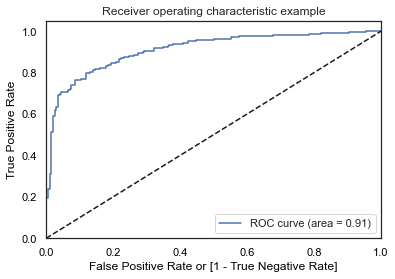

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [469]:
draw_roc(y_test, probs_gbdt)

### XGBOOST

In [470]:
import xgboost as xgb
from xgboost import XGBClassifier

#### XGBOOST - Model1

In [471]:
# fit model on training data with default hyperparameters
xgb1 = XGBClassifier()
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [472]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
prob_xgb1 = xgb1.predict_proba(X_test)
pred_xgb1= xgb1.predict(X_test)
prob_xgb1[:10]

array([[7.8892708e-04, 9.9921107e-01],
       [1.2567174e-01, 8.7432826e-01],
       [2.1662062e-01, 7.8337938e-01],
       [9.5471764e-01, 4.5282386e-02],
       [1.2489200e-02, 9.8751080e-01],
       [1.2548149e-02, 9.8745185e-01],
       [6.5926534e-01, 3.4073466e-01],
       [9.9624741e-01, 3.7525799e-03],
       [1.8610954e-03, 9.9813890e-01],
       [6.4154023e-01, 3.5845977e-01]], dtype=float32)

In [473]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, prob_xgb1[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 89.64%


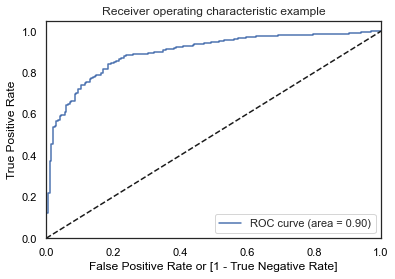

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00497512, 0.00497512,
        0.00497512, 0.00497512, 0.00497512, 0.00497512, 0.00497512,
        0.00497512, 0.00497512, 0.00497512, 0.00497512, 0.00497512,
        0.00497512, 0.00497512, 0.00497512, 0.00

In [474]:
draw_roc(y_test, prob_xgb1[:, 1])

In [475]:
#Classification report
print(classification_report(y_test,pred_xgb1))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       201
           1       0.90      0.88      0.89       469

    accuracy                           0.84       670
   macro avg       0.81      0.82      0.82       670
weighted avg       0.85      0.84      0.85       670



In [476]:
###This gave the best recall so far among the models

#### hyperparameter tuning with XGBoost

In [477]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.05,0.1,0.2, 0.6], 
             'subsample': [0.15,0.3, 0.6, 0.9]}          
# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)
# set up GridSearchCV()
xgb_cv = GridSearchCV(estimator = xgb1, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

In [478]:
# fit the model
xgb_cv.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012...
                                     max_cat_threshold=64, max_cat_to_onehot=4,
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.6],
                         'subsample': [0.15, 0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [479]:
cv_results = pd.DataFrame(xgb_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.154254,0.002488,0.010306,0.000470,0.05,0.15,"{'learning_rate': 0.05, 'subsample': 0.15}",0.912374,0.920159,0.898183,0.910239,0.009098,12,0.956826,0.951700,0.951083,0.953203,0.002574
1,0.169214,0.003849,0.010306,0.000470,0.05,0.3,"{'learning_rate': 0.05, 'subsample': 0.3}",0.911449,0.920804,0.911457,0.914570,0.004408,10,0.977841,0.971206,0.970607,0.973218,0.003278
2,0.181847,0.003761,0.010306,0.000470,0.05,0.6,"{'learning_rate': 0.05, 'subsample': 0.6}",0.909245,0.933723,0.921043,0.921337,0.009995,6,0.985894,0.985228,0.983706,0.984943,0.000916
3,0.186502,0.001411,0.010970,0.001410,0.05,0.9,"{'learning_rate': 0.05, 'subsample': 0.9}",0.900097,0.933636,0.921898,0.918544,0.013896,7,0.988347,0.987768,0.985390,0.987168,0.001280
4,0.156249,0.000470,0.010306,0.000470,0.1,0.15,"{'learning_rate': 0.1, 'subsample': 0.15}",0.907793,0.911218,0.905429,0.908146,0.002377,13,0.972274,0.965958,0.964744,0.967659,0.003301
5,0.165558,0.002154,0.010638,0.000470,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.905842,0.919652,0.919290,0.914928,0.006427,9,0.991555,0.985472,0.985948,0.987658,0.002762
6,0.188829,0.007389,0.010638,0.000470,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.901658,0.936897,0.931615,0.923390,0.015517,4,0.996372,0.994879,0.995727,0.995659,0.000611
7,0.194149,0.003390,0.010305,0.000470,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.902243,0.938484,0.936150,0.925626,0.016561,2,0.997022,0.995828,0.996952,0.996601,0.000547
8,0.167885,0.006219,0.010638,0.000470,0.2,0.15,"{'learning_rate': 0.2, 'subsample': 0.15}",0.895169,0.903624,0.907856,0.902216,0.005274,14,0.983659,0.976199,0.976816,0.978891,0.003381
9,0.176860,0.010182,0.010306,0.000470,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.903125,0.912653,0.924485,0.913421,0.008737,11,0.998525,0.994282,0.995787,0.996198,0.001757


In [480]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.154254,0.002488,0.010306,0.00047,0.05,0.15,"{'learning_rate': 0.05, 'subsample': 0.15}",0.912374,0.920159,0.898183,0.910239,0.009098,12,0.956826,0.951700,0.951083,0.953203,0.002574
1,0.169214,0.003849,0.010306,0.00047,0.05,0.30,"{'learning_rate': 0.05, 'subsample': 0.3}",0.911449,0.920804,0.911457,0.914570,0.004408,10,0.977841,0.971206,0.970607,0.973218,0.003278
2,0.181847,0.003761,0.010306,0.00047,0.05,0.60,"{'learning_rate': 0.05, 'subsample': 0.6}",0.909245,0.933723,0.921043,0.921337,0.009995,6,0.985894,0.985228,0.983706,0.984943,0.000916
3,0.186502,0.001411,0.010970,0.00141,0.05,0.90,"{'learning_rate': 0.05, 'subsample': 0.9}",0.900097,0.933636,0.921898,0.918544,0.013896,7,0.988347,0.987768,0.985390,0.987168,0.001280
4,0.156249,0.000470,0.010306,0.00047,0.10,0.15,"{'learning_rate': 0.1, 'subsample': 0.15}",0.907793,0.911218,0.905429,0.908146,0.002377,13,0.972274,0.965958,0.964744,0.967659,0.003301


In [481]:
### Comment on Subsample and Learning Rate
# Lower learning rates appears to be doing better in terms of test scores

#### XGBOOST Model2

In [482]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.05,
          'max_depth': 5, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb2 = XGBClassifier(learning_rate=0.05,max_depth=7 ,n_estimators=150,objective='binary:logistic', seed=0, subsample=0.3)
xgb2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [494]:
# predict
prob_xgb2 = xgb2.predict_proba(X_test)
pred_xgb2= xgb2.predict(X_test)
prob_xgb2=prob_xgb2[:,[1]]

In [497]:
# roc_auc
auc = sklearn.metrics.roc_auc_score(y_test, prob_xgb2)
auc

0.9161760493905737

In [498]:
print(accuracy_score(y_test,pred_xgb2))

0.8462686567164179


In [499]:
#Classification report
print(classification_report(y_test,pred_xgb2))

              precision    recall  f1-score   support

           0       0.70      0.84      0.77       201
           1       0.93      0.85      0.89       469

    accuracy                           0.85       670
   macro avg       0.81      0.84      0.83       670
weighted avg       0.86      0.85      0.85       670



#### Final XG-Boost Predictions as per Business Problemm 

In [500]:
### For better Recall - I am changing the threshold to 0.34 (Tried couple of theresholds between 0.3 to 0.4, this has better balance)
xg_pred_final = np.where(prob_xgb2>0.34,1,0)

In [501]:
#Classification report
print(classification_report(y_test,xg_pred_final))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       201
           1       0.90      0.90      0.90       469

    accuracy                           0.86       670
   macro avg       0.83      0.83      0.83       670
weighted avg       0.86      0.86      0.86       670



In [502]:
print(accuracy_score(y_test,xg_pred_final))

0.8552238805970149


### Ada-Boost 

In [511]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [3,4,5],
              "n_estimators": [50,100,150]
             }

In [512]:
# base estimator
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME")

In [513]:
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

In [514]:
grid_search_ABC.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(),
                                          learning_rate=0.6),
             param_grid={'base_estimator__max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [515]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.153146,0.005405,0.009296,0.000490,3,50,"{'base_estimator__max_depth': 3, 'n_estimators...",0.887436,0.915725,0.896382,0.899848,0.011806,9,0.940755,0.942707,0.949897,0.944453,0.003931
1,0.297441,0.003057,0.016601,0.000467,3,100,"{'base_estimator__max_depth': 3, 'n_estimators...",0.893915,0.922144,0.908175,0.908078,0.011525,7,0.961155,0.955575,0.962427,0.959719,0.002976
2,0.464449,0.000946,0.022920,0.000815,3,150,"{'base_estimator__max_depth': 3, 'n_estimators...",0.894952,0.926956,0.911377,0.911095,0.013067,5,0.971592,0.963831,0.970165,0.968529,0.003373
3,0.189171,0.001225,0.009632,0.000445,4,50,"{'base_estimator__max_depth': 4, 'n_estimators...",0.897846,0.918511,0.907244,0.907867,0.008448,8,0.973213,0.971135,0.973818,0.972722,0.001149
4,0.379738,0.005669,0.016623,0.000486,4,100,"{'base_estimator__max_depth': 4, 'n_estimators...",0.897412,0.925383,0.918547,0.913781,0.011906,4,0.982778,0.984195,0.986448,0.984473,0.001511
5,0.564576,0.001810,0.024117,0.001305,4,150,"{'base_estimator__max_depth': 4, 'n_estimators...",0.895602,0.930694,0.925789,0.917362,0.015516,3,0.990856,0.992844,0.992780,0.992160,0.000922
6,0.221943,0.002666,0.009966,0.000029,5,50,"{'base_estimator__max_depth': 5, 'n_estimators...",0.885409,0.923300,0.921155,0.909955,0.017378,6,0.986465,0.993233,0.993534,0.991077,0.003264
7,0.439926,0.006575,0.017290,0.000943,5,100,"{'base_estimator__max_depth': 5, 'n_estimators...",0.889427,0.937020,0.930336,0.918928,0.021038,2,0.996502,0.999074,0.998833,0.998136,0.001160
8,0.651072,0.012616,0.024587,0.000460,5,150,"{'base_estimator__max_depth': 5, 'n_estimators...",0.898706,0.942020,0.937281,0.926002,0.019398,1,0.999567,0.999995,0.999821,0.999794,0.000176


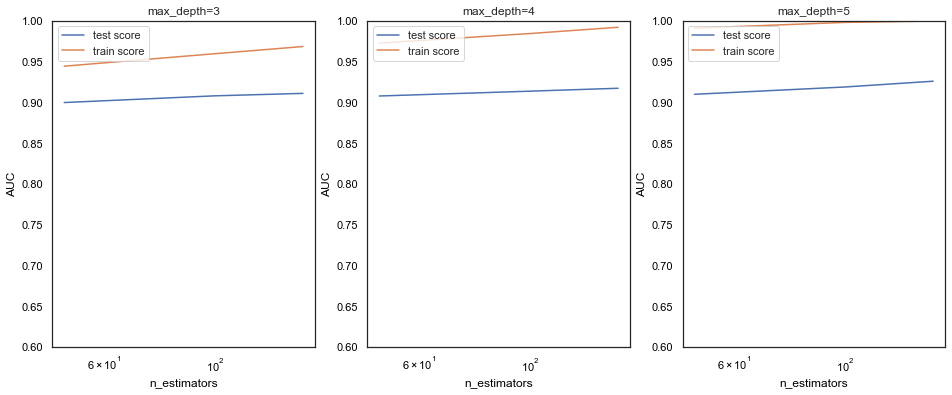

In [516]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


The results above show that:
- The ensemble with max_depth=5 is clearly overfitting (training auc is almost 1, while the test score is much lower)
- At max_depth=4, the model performs slightly better (approx 95%+ AUC) with a higher test score 

Thus, we should go ahead with ```max_depth=4``` and ```n_estimators=100```.

In [517]:
# model performance on test data with chosen hyperparameters

# base estimator
tree = DecisionTreeClassifier(max_depth=4)

# adaboost with the tree as base estimator
ABC = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=100,
    algorithm="SAMME")

ABC.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=4),
                   n_estimators=100)

In [520]:
# predict on test data
prob_Ada = ABC.predict_proba(X_test)
pred_ada= ABC.predict(X_test)
prob_Ada =prob_Ada[:,[1]]

In [521]:
print(classification_report(y_test,pred_ada))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       201
           1       0.91      0.86      0.88       469

    accuracy                           0.84       670
   macro avg       0.81      0.83      0.82       670
weighted avg       0.85      0.84      0.84       670



In [522]:
print(accuracy_score(y_test,pred_ada))

0.8417910447761194


#### Out of all the Models considering Recall,Accuracy, AUC-ROC scores, i would finally pick Model3-Random forest and Model2-XGBOOST after i changed the threshold <0.4

### Final XG-BOOST

In [523]:
#Classification report
print(classification_report(y_test,xg_pred_final))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       201
           1       0.90      0.90      0.90       469

    accuracy                           0.86       670
   macro avg       0.83      0.83      0.83       670
weighted avg       0.86      0.86      0.86       670



In [527]:
auc_XGB_Final = sklearn.metrics.roc_auc_score(y_test, prob_xgb2)
auc_XGB_Final

0.9161760493905737

### Final Random Forest

In [526]:
# Let's check the report of our default model
print(classification_report(y_test,predictions4))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       201
           1       0.91      0.90      0.90       469

    accuracy                           0.87       670
   macro avg       0.84      0.85      0.84       670
weighted avg       0.87      0.87      0.87       670



In [529]:
auc_RF_Final = sklearn.metrics.roc_auc_score(y_test, probs3)
auc_RF_Final

0.9200903796582123

### Insights and recommendations

1. There are 19104 rows of data with 12 columns (Not considering the 1st Unnamed Column) <br>
2. Majority of the columns 8 out of 12 are numeric and rest 4 are object which are mostly dates and city names <br>
3. Lastworking date being the Target variable has only 1616 Non-Null values (the drivers who actually left) <br>
4. Converting the columns:['MMM-YY','Dateofjoining'] to datetime format, extracting Month and year and dropping the actual column <br>
5. ENcoded last workingdate to (0,1) --> 1 where there is a last working date <br>
6. Males and females are in the ratio of 6:4 <br>
7. Majority of the drivers appear to have joined between 2018-2020 <br>
8. Educations levels show no big variation among the drivers, they are slightly more drivers of level1 <br>
9. There seems to be lot of varation between the incomes of drivers ranging from 10000-1lakh+ <br>
10. more than 70% of the drivers belong to Grade 1,2,3 <br>
11. Most of drivers join with designation 1 <br>
12. Business value generated appears to increase with Grade but less for Grade 5<br>
13. As we could expect Business value generated is very less for drivers with lower rating (May be that is the reason they were rated low) <br>
14. Drivers who left appear to be more concentrated at lesser ages <br>
15. Percentage of Drivers left is high in grades 1,2,3 <br>
16. As there are only 12 drivers whose income increased, close 60% of the people who got no income increase left and None from those whose income increased have left <br>
17. Among 1800 people who did not get a rating increase, 1400 have left <br>

**Recommendations**

1. Increasing the income of those who perform well would make less people leave <br>
2. Increasing the rating of the people also might be a bit positive as we see % of people who left given a rating increase were less <br>
3. As low grade drivers are the ones who tend to leave the company the most, increasing the grade should be fruitful. <br>
4. as we saw less business value being generated from low rating drivers, its better to retain those from rating 2 and 3 as they tend to be safer drivers than those of rating 1. <br>
5. Grade 2 is the best grade to target as attrition is really high there and also they are better drivers than those in grade1<br>



### Interview Questions

Advantages of forest based models
--> better interpretation to Business
--> It can work on Non-linear data too
--> Can work with Categorical columns too 

Split in trees is based on Entropy,Ginie impurity,Info Gain

why SMOTE might be bad-- issue with synthetic data ?
do read about do and donts of data imbalance.

why decision trees is robust to outliers: AS DT is based on splitting so actual values are not actually very imp

while scaling::
fit and transform on train and only transform on test

decission Tree is good for what else other than prediction:
Feature Importance

